# Timeseries Analysis of the Prawler Chlorophyll Data 2018 M2

Prior to the following visual analysis, the Prawler data had been ingested and interpolated to hourly data in time and 1dB data in depth.  The shallowest depths the prawler recorded data at was ~3dB and the deepest ~47dB

![PrawlerTimeseries](images/18BSITAEPR_Chlor.png)

Timeseries of all prawler paramaters.  Data has been interpolated to 1dBar bins in depth and is plotted between 0-50dbar.  Gaps in data are from equipment malfunction, poor signals, and changes in sample strategies.

In [9]:
%matplotlib inline

In [10]:
import datetime
import pandas as pd


### Read in Data Set

the chlorophyl has been previously integrated between 5-45dBar from 1dBar gridded data

In [11]:
f='data/18M2_Chlor_allsources.xlsx' #previously processed Prawler data combined with EcoFluorometer data

data = pd.read_excel(f,parse_dates=True,index_col='time')

In [12]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3680 entries, 2018-05-01 21:00:00 to 2018-10-02 04:00:00
Data columns (total 7 columns):
11m Prawler    3671 non-null float64
25m Prawler    3665 non-null float64
44m Prawler    3605 non-null float64
11m Eco        3680 non-null float64
25m Eco        3680 non-null float64
44m Wetlabs    3677 non-null float64
55m Eco        3680 non-null float64
dtypes: float64(7)
memory usage: 230.0 KB


,11m Prawler,25m Prawler,44m Prawler,11m Eco,25m Eco,44m Wetlabs,55m Eco
time,,,,,,,
2018-05-01 21:00:00,NaN,NaN,NaN,0.018744,0.015146,1.515675,0.001297
2018-05-01 22:00:00,0.760,1.403,0.765,0.075943,0.017200,1.600583,0.060756
2018-05-01 23:00:00,0.817,2.149,0.784,0.753696,1.364308,1.481824,0.564642
2018-05-02 00:00:00,0.767,1.367,0.891,0.937417,1.379857,1.430910,1.051996
2018-05-02 01:00:00,0.975,1.000,0.916,0.873403,1.442737,1.346016,1.120246


### Evaluating the entire time series

No handles with labels found to put in legend.


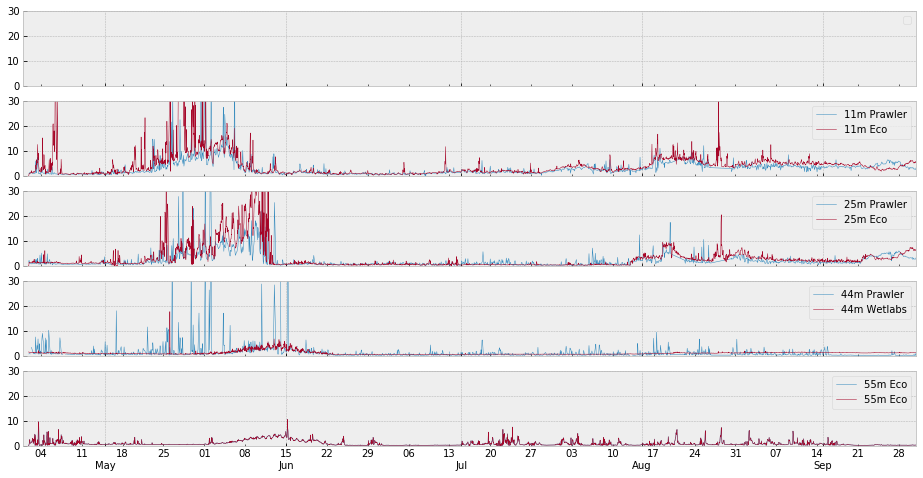

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

plt.style.use('bmh')

def axis_formater(ax):
    ax.xaxis.set_major_locator(dates.DayLocator(bymonthday=15))
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.legend()
    ax.set_xlim([datetime.datetime(2018,5,1),datetime.datetime(2018,10,1)])
    ax.set_ylim([0,30])
    return (ax)

fig = plt.figure(figsize=(16,8))
plt.subplot(5,1,1)
ax=plt.gca()
ax = axis_formater(ax)

plt.subplot(5,1,2)
ax=plt.gca()
plt.plot(data.index,data['11m Prawler'],linewidth=.5)
plt.plot(data.index,data['11m Eco'],linewidth=.5)
ax = axis_formater(ax)

plt.subplot(5,1,3)
ax=plt.gca()
plt.plot(data.index,data['25m Prawler'],linewidth=.5)
plt.plot(data.index,data['25m Eco'],linewidth=.5)
ax = axis_formater(ax)

plt.subplot(5,1,4)
ax=plt.gca()
plt.plot(data.index,data['44m Prawler'],linewidth=.5)
plt.plot(data.index,data['44m Wetlabs'],linewidth=.5)
ax = axis_formater(ax)

plt.subplot(5,1,5)
ax=plt.gca()
plt.plot(data.index,data['55m Eco'],linewidth=.5)
plt.plot(data.index,data['55m Eco'],linewidth=.5)
ax = axis_formater(ax)

ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.xaxis.set_tick_params(which='major', pad=15)



In [16]:
fig.savefig('images/18M2_Chlor_allsources_zoom.png')